Credit given to PyAutoLens' introductory tutorial on interferometry: https://pyautolens.readthedocs.io/en/latest/overview/overview_6_interferometry.html

In [2]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

import matplotlib.pyplot as plt
from os import path

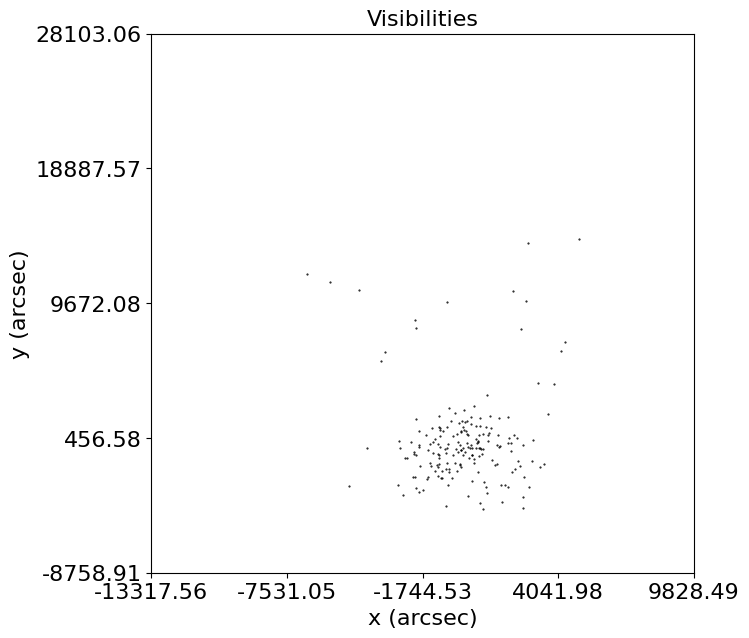

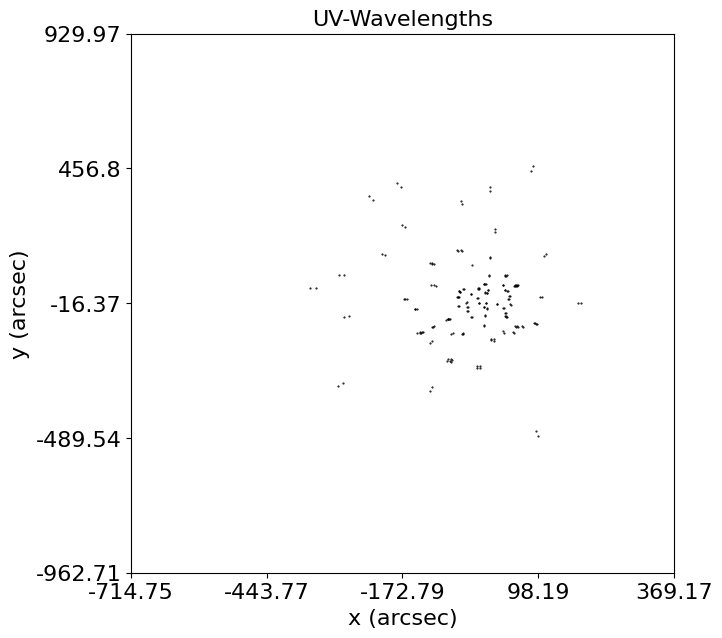

In [3]:
real_space_mask_2d = al.Mask2D.circular(
    shape_native=(400, 400), pixel_scales=0.025, radius=3.0
)
dataset_path = r"C:\Users\aravb\OneDrive\Desktop\autolens_workspace\dataset\interferometer\dark_matter_subhalo"

interferometer = al.Interferometer.from_fits(
    visibilities_path=path.join(dataset_path, "visibilities.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    uv_wavelengths_path=path.join(dataset_path, "uv_wavelengths.fits"),
    real_space_mask=real_space_mask_2d
)

interferometer_plotter = aplt.InterferometerPlotter(interferometer=interferometer)
interferometer_plotter.figures_2d(visibilities=True, uv_wavelengths=True)

c:\Users\aravb\OneDrive\Desktop\autolens_workspace\autolens\lib\site-packages\pynufft\linalg\nufft_cpu.py:381: ComplexWarning: Casting complex values to real discards the imaginary part
  xx.ravel()[self.NdCPUorder * self.batch + bat] = k.ravel()[


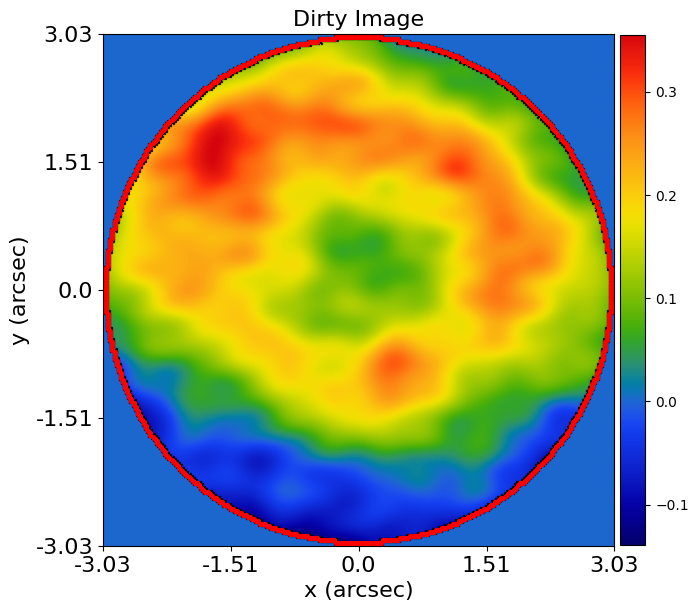

c:\Users\aravb\OneDrive\Desktop\autolens_workspace\autolens\lib\site-packages\pynufft\linalg\nufft_cpu.py:381: ComplexWarning: Casting complex values to real discards the imaginary part
  xx.ravel()[self.NdCPUorder * self.batch + bat] = k.ravel()[


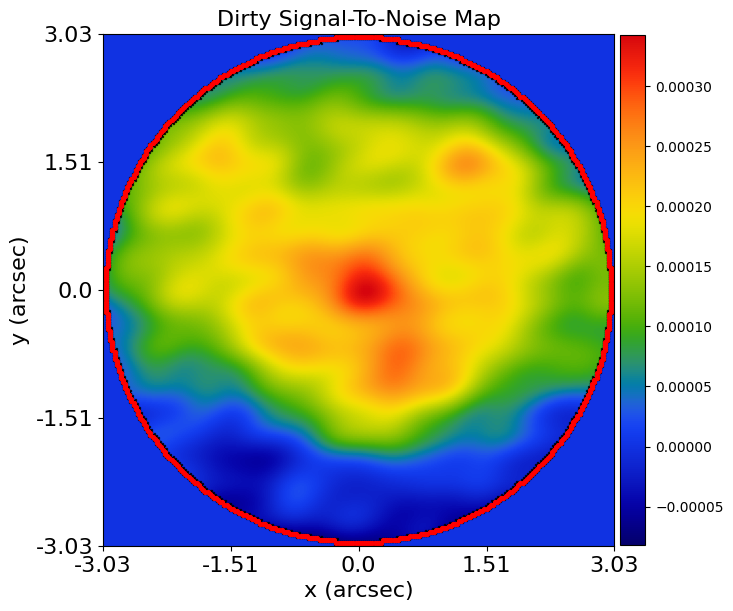

In [4]:
interferometer_plotter = aplt.InterferometerPlotter(interferometer=interferometer)
interferometer_plotter.figures_2d(dirty_image=True, dirty_signal_to_noise_map=True)

In [5]:
lens_galaxy_0 = al.Galaxy(
    redshift=0.5,
    bulge=al.lmp.Sersic(
        centre=(0.0, 0.0),
        ell_comps=(0.0, 0.05),
        intensity=0.5,
        effective_radius=0.3,
        sersic_index=3.5,
        mass_to_light_ratio=0.6,
    ),
    disk=al.lmp.Exponential(
        centre=(0.0, 0.0),
        ell_comps=(0.0, 0.1),
        intensity=1.0,
        effective_radius=2.0,
        mass_to_light_ratio=0.2,
    ),
    dark=al.mp.NFWSph(centre=(0.0, 0.0), kappa_s=0.08, scale_radius=30.0),
)

lens_galaxy_1 = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.Exponential(
        centre=(0.00, 0.00),
        ell_comps=(0.05, 0.05),
        intensity=1.2,
        effective_radius=0.1,
    ),
    mass=al.mp.Isothermal(
        centre=(0.0, 0.0), ell_comps=(0.05, 0.05), einstein_radius=0.6
    ),
)

source_galaxy = al.Galaxy(
    redshift=2.0,
    bulge=al.lp.Sersic(
        centre=(0.0, 0.0),
        ell_comps=(0.0, 0.111111),
        intensity=0.7,
        effective_radius=0.1,
        sersic_index=1.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy_0, lens_galaxy_1, source_galaxy])

In [6]:
transformer_class = al.TransformerNUFFT
interferometer = interferometer.apply_settings(
    settings=al.SettingsInterferometer(transformer_class=transformer_class)
)

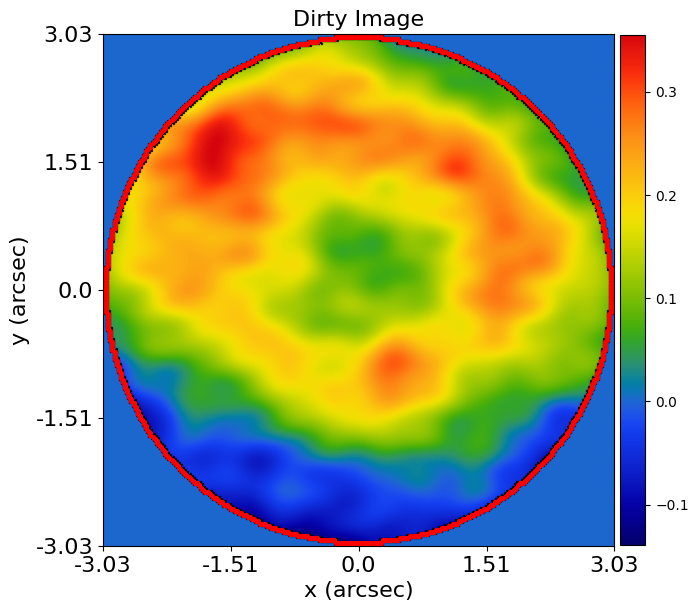

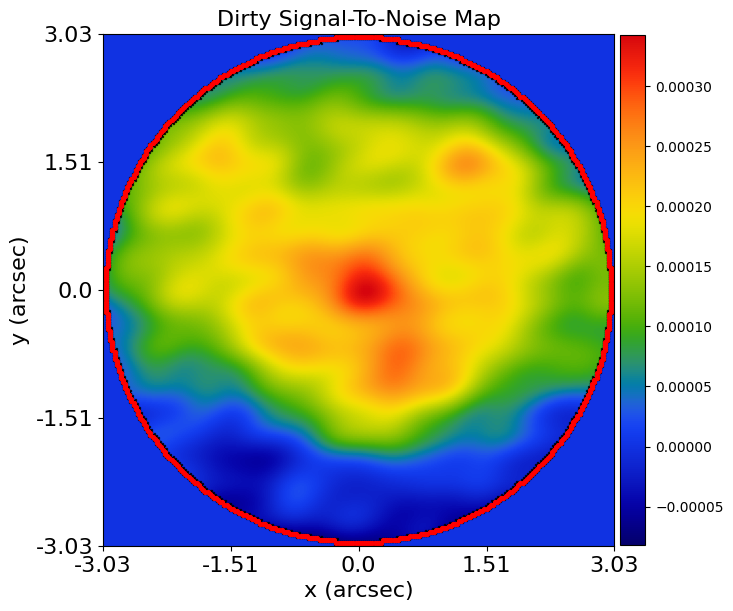

In [7]:
interferometer_plotter = aplt.InterferometerPlotter(interferometer=interferometer)
interferometer_plotter.figures_2d(dirty_image=True, dirty_signal_to_noise_map=True)